In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter

#from matplotlib import rcParams
#rcParams['figure.figsize'] = 16, 12
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma']

## Load MEG Data for Testing (Using omegamappin-library)

In [2]:
import sys
sys.path.append('/Users/tom/Documents/GitCode/omegamappin/')

from om.core.db import OMDB
from om.core.io import load_meg_psds

In [3]:
# Get database and path details from OMDB class
db = OMDB()
# Check available subject numbers for PSD files
sub_nums = db.check_dat_files('PSD')


Number of Subjects available: 103

Subject numbers with FOOF data available: 
[111802, 124340, 195121, 215187, 218131, 220216, 245518, 265922, 320548, 339964, 369737, 386068, 390845, 403435, 405716, 431088, 504997, 548027, 559176, 604600, 704718, 704814, 719634, 756575, 978341, 100307, 102816, 105923, 106521, 109123, 111514, 112920, 113922, 116524, 116726, 140117, 146129, 153732, 154532, 156334, 158136, 162026, 162935, 164636, 166438, 172029, 174841, 175237, 175540, 181232, 185442, 187547, 189349, 191033, 191437, 191841, 192641, 195041, 198653, 204521, 205119, 212318, 212823, 214524, 221319, 223929, 233326, 248339, 250427, 255639, 257845, 283543, 293748, 352132, 352738, 353740, 358144, 406836, 433839, 512835, 555348, 559053, 568963, 581450, 599671, 601127, 660951, 662551, 665254, 667056, 706040, 707749, 715950, 725751, 735148, 783462, 814649, 877168, 891667, 898176, 912447, 917255, 990366]



In [18]:
# Get PSD files
psd_files, _ = db.check_dat_files('PSD', verbose=False)

In [19]:
# Load MEG Data
subj = 352132
psd, freqs = load_meg_psds('HCP', db.psd_path, subj)

In [41]:
# Set which PSD to run
# 4799
cur_psd = np.log10(psd[4799, :])

### Or: Load MEG Data from file

In [14]:
#dat = np.load('meg_dat.npy')
#freqs = dat[0]
#psd = dat[1]

## Load EEG data for testing

In [8]:
# Load
dat = np.load('data-for-tom.npy').item()

# Get freqs & unembed from being an array of arrays
freqs = dat['f']
freqs = np.array([f[0] for f in freqs])

In [9]:
# Grab psd of interest
cur_psd = np.log10(dat[0][20]['eyeso'])

## RUN FOOOF

In [42]:
# Custom Code Import
%autoreload 2
from fooof import FOOOF

In [43]:
ff = FOOOF()
f_range = [3, 40]


                                          FOOOF - PSD MODEL                                          

                     The input PSD was modelled in the frequency range 3-40 Hz                      
                                 Frequency Resolution is 0.49 Hz 
                                  
                                      Background Parameters:                                        
                                    -21.9204, -0.9562, 1.93e-17                                     

                                      3 oscillations were found:                                     
                                 CF:   9.90, Amp:  0.362, BW:  2.45                                 
                                 CF:  10.53, Amp:  0.275, BW:  0.50                                 
                                 CF:  18.30, Amp:  0.389, BW:  5.65                                 

                                R-squared error of model fit is 0.0335               

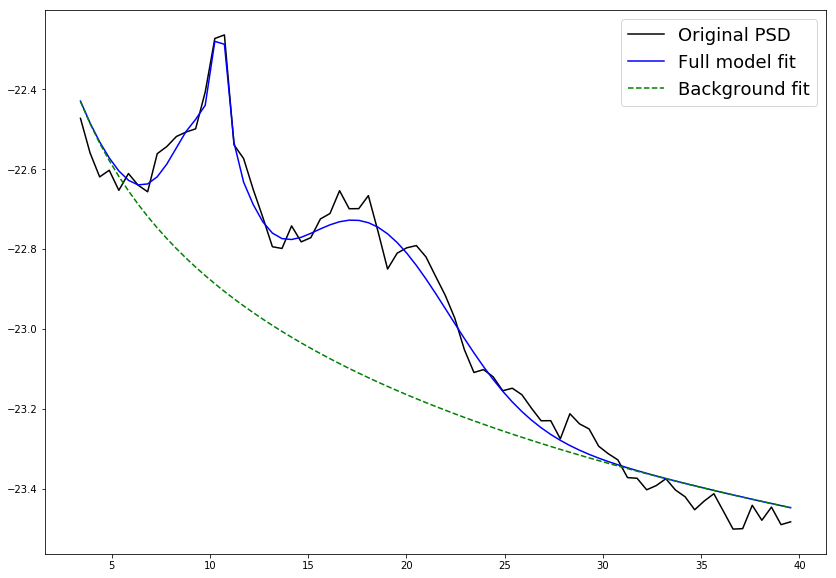

In [44]:
ff.model(freqs, cur_psd, f_range)

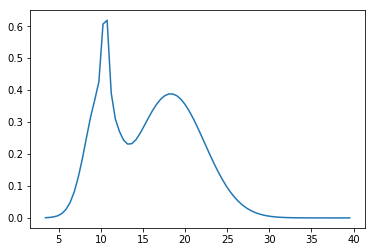

In [45]:
plt.plot(ff.freqs, ff._oscillation_fit)

In [ ]:
# For setting centering size based on consol width:
#import os
#print("hello world".center(os.get_terminal_size().columns))